# Matemática para Ciencia de los Datos
# Trabajo Práctico 4

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo del Prof. Dr. Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 19 de agosto del 2025, hora límite las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. **Nombre_Estudiante_1**
1. **Nombre_Estudiante_2**


# Matemática para Ciencia de los Datos
# Trabajo Práctico 4

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo del Prof. Dr. Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 19 de agosto del 2025, hora límite las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. **Nombre_Estudiante_1**
1. **Nombre_Estudiante_2**



---

## Parte 1

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   1.,2. \\
   3.,4.
\end{bmatrix}
\end{equation}




**Ejercicio 1.1 (25 puntos)**

En una celda de texto, calcule los auto-valores y deje planteada la ecuación para el cálculo de los los auto-vectores como los ejemplos vistos en clase. Debe mostrar todo el procedimiento.

$$
A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix},
\quad
A - \lambda I = 
\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} 
- \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} 
= \begin{pmatrix} 1 - \lambda & 2 \\ 3 & 4 - \lambda \end{pmatrix}
$$

$$
\left| \begin{matrix} 1 - \lambda & 2 \\ 3 & 4 - \lambda \end{matrix} \right| = 0
\quad\Rightarrow\quad
(1 - \lambda)(4 - \lambda) - 6 = 0
$$

$$
4 - \lambda - 4\lambda + \lambda^2 - 6 = 0
\quad\Rightarrow\quad
\lambda^2 - 5\lambda - 2 = 0
$$

<div align="center">Es una ecuación cuadrática</div>

$$
a\lambda^2 + b\lambda + c = 0 
\quad\Rightarrow\quad 
\lambda = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

$$
\lambda = \frac{5 \pm \sqrt{25 + 8}}{2}
\quad\Rightarrow\quad
\lambda_1 = \frac{5 + \sqrt{33}}{2},\quad
\lambda_2 = \frac{5 - \sqrt{33}}{2}
$$

Lo siguiente fue hecho por mi compañero Sergio:

\begin{equation}

\left(
  \begin{bmatrix}
   1. & 2. \\
   3. & 4.
  \end{bmatrix}
  - \lambda * \large{I}
\right)
* \vec{x} = 0  \Rightarrow


\begin{bmatrix}
1. & 2. \\
3. & 4.
\end{bmatrix}

\begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}

- 

\begin{bmatrix}
\lambda & 0. \\
0. &  \lambda
\end{bmatrix}

\begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}

 = 0  \Rightarrow
\end{equation}




\begin{equation}

  \begin{bmatrix}
   1x_1 + 2x_2 \\
   3x_1 + 4x_2.
  \end{bmatrix}
  =

  \begin{bmatrix}
   \lambda x_1  \\
   \lambda x_2
  \end{bmatrix}

\end{equation}

**Ejercicio 1.2 (25 puntos)**

En una celda de código y utilizando la función eig de numpy, calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide las pequeñas posibles diferencias por precisión de la representación numérica).


In [1]:
import numpy as np
from numpy import linalg as LA
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig

def calcule(A):
    print("===================================================")
    print("A:")
    print(A)
    l, x = LA.eig(A)
    print("l-autovalores: ")
    print(l)
    print("x-autovectores: (Note que vienen normalizados)")
    print(x)
    # Prueba
    print("Prueba de resultados")

    print("A*x:")
    print(np.matmul(A,x))
    print("l*x: ")
    # en x los auto-vectores son columnas, por eso para multiplicarlos por los
    # auto-valores respectivos se hace este código y se genera una matriz ya
    # multiplicado cada auto-valor por su respectivo auto-vector
    result = []
    for i in range(len(l)):
        columna = l[i]*x[:,i]
        result.append(columna)
    # se transpone porque result quedó con los vectores en forma de fila y son
    # vectores columna (auto-vectores)
    result = np.array(result).transpose()
    print(result)

A = np.array([[1, 2], [3, 4]])
calcule(A)

A:
[[1 2]
 [3 4]]
l-autovalores: 
[-0.37228132  5.37228132]
x-autovectores: (Note que vienen normalizados)
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Prueba de resultados
A*x:
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]
l*x: 
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]



---

## Parte 2


Realice lo siguiente: **(40 puntos)**
1. Similar a los ejemplos vistos, aplíquele la estrategia PCA a los datos en el archivo adjunto "data_banknote_authentication.csv" (el $Y$ corresponde a la columna llamada clase).
1. En este caso use los tres primeros componentes principales (no dos como en el ejemplo).
1. El ejercicio termina graficando la varianza acumulada versus los componentes principales.

---



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 4]

In [2]:
# carga un dataset
archivo = "data_banknote_authentication.csv"
df = pd.read_csv(archivo, delimiter=';')
X = df.iloc[:, 0:4]
Y = df.iloc[:, -1:]

print("X shape:", X.shape)
print(X.head(), "\n")

print("Y shape:", Y.shape)
print(Y.head())

# Escalar los datos en X
X_zscaled = (X - X.mean()) / X.std(ddof=1)

tiposDeClases = np.unique(Y['class'] )
print("Tipos de clases: ", tiposDeClases)
print("\n\n X escalado a promedio 0:")
print(X_zscaled[0:3])

X shape: (1372, 4)
   varianceofWavelet  skewnessofWavelet  curtosisofWavelet  entropyofimage
0            3.62160             8.6661            -2.8073        -0.44699
1            4.54590             8.1674            -2.4586        -1.46210
2            3.86600            -2.6383             1.9242         0.10645
3            3.45660             9.5228            -4.0112        -3.59440
4            0.32924            -4.4552             4.5718        -0.98880 

Y shape: (1372, 1)
   class
0      0
1      0
2      0
3      0
4      0
Tipos de clases:  [0 1]


 X escalado a promedio 0:
   varianceofWavelet  skewnessofWavelet  curtosisofWavelet  entropyofimage
0           1.121397           1.149036          -0.975614        0.354432
1           1.446538           1.064065          -0.894710       -0.128721
2           1.207369          -0.777069           0.122174        0.617848


In [3]:
# calcula los auto-valores y auto-vectores
eigenvalues, eigenvectors = np.linalg.eig(np.cov(X_zscaled,rowvar=False))
'''
Para np.cov
rowvar : [bool, optional] If rowvar is True (default), then each row represents a
variable, with observations in the columns. Otherwise, the relationship is transposed
'''
# los normaliza
eigenvalues_normalized = eigenvalues / eigenvalues.sum()
# calcula la varianza explicada
cumvar_explained = np.cumsum(eigenvalues_normalized)

############################################################
# Ordenar de mayor a menor, 
# debido a que np.linalg.eig no asegura que vengan ordenados
idx = np.argsort(eigenvalues) 
print( "idx: ", idx )
idx = idx[::-1]     
print("\n\nidx[::-1]: ", idx  )

# Ordenar tanto los autovalroes como los autovectores
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx] 


print("Auto-valores:")
print(eigenvalues)
print("Auto-vectores:")
print( eigenvectors)
print("eigenvalues_normalized:")
print(eigenvalues_normalized)
print("Varianza explicada:")
print( cumvar_explained )


idx:  [3 2 1 0]


idx[::-1]:  [0 1 2 3]
Auto-valores:
[2.17990407 1.2931549  0.35138243 0.17555859]
Auto-vectores:
[[-0.24877213 -0.75459093  0.60346443  0.06734722]
 [-0.6393234   0.05034037 -0.11596089 -0.75847512]
 [ 0.6127065   0.1534594   0.5096688  -0.58419061]
 [ 0.39238854 -0.6360099  -0.6021806  -0.28089352]]
eigenvalues_normalized:
[0.54497602 0.32328872 0.08784561 0.04388965]
Varianza explicada:
[0.54497602 0.86826474 0.95611035 1.        ]


In [4]:
# Proyecta los datos y los grafica
T = pd.DataFrame(X_zscaled.dot(eigenvectors))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4']

# agrega la etiqueta de las especies
T = pd.concat([T, Y['class']], axis=1)

print("Parte de las muestras proyectadas")
print(T.head(5))
print(T.shape)

Parte de las muestras proyectadas
        pc1       pc2       pc3       pc4  class
0 -1.472268 -1.163492 -0.167193 -0.325605      0
1 -1.638843 -1.093413  0.371052 -0.150809      0
2  0.513732 -1.324397  0.508926  0.425778      0
3 -2.310110 -0.202441  0.540584  0.143742      0
4  1.192981  0.024645  0.421036  0.364361      0
(1372, 5)


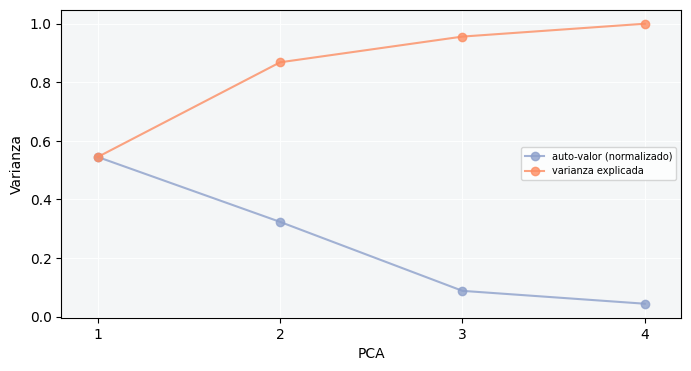

In [5]:
#########################################
# Primer gráfico
#########################################
# define un color por especie
colors = ['#1b9e77', '#d95f02', '#7570b3']

_, (ax1) = plt.subplots(1, sharey=False)

# muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 4.2)
ax1.set_xticks([1,2,3,4])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

___

## Parte 3

Como en el segundo gráfico del cuaderno visto en clase sobre PCA, grafique los tres mayores componentes principales utilizando la bibioteca **plotly** https://plotly.com/python/3d-scatter-plots/  **(10 puntos)**


___

In [ ]:
import plotly.express as px
fig = px.scatter_3d(T, x='pc1', y='pc2', z='pc3',
              color='class')
fig.show()